**https://www.kaggle.com/datasets/jaykumar1607/valorant-masters-2021-player-map-data?resource=download**

**https://www.kaggle.com/datasets/evangower/valorant-esports-top-earnings/code?select=Teams.csv**

In [1]:
# Importing Data Exploration Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#importing stats of players from valorant masters players' matches
players = pd.read_csv('player_stats.csv')
#checking overview of data
players.head(5)

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5


In [3]:
#inspecting columns 
players.columns

Index(['Player', 'Country', 'Team', 'Agents', 'Maps', 'K', 'D', 'A', 'KD',
       'KDA', 'ACS/Map', 'K/Map', 'D/Map', 'A/Map'],
      dtype='object')

In [4]:
#number of unique participators
players.Player.nunique()

50

In [5]:
# looking at unfilled spaces and object types of rows
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   50 non-null     object 
 1   Country  50 non-null     object 
 2   Team     50 non-null     object 
 3   Agents   50 non-null     object 
 4   Maps     50 non-null     int64  
 5   K        50 non-null     int64  
 6   D        50 non-null     int64  
 7   A        50 non-null     int64  
 8   KD       50 non-null     float64
 9   KDA      50 non-null     float64
 10  ACS/Map  50 non-null     int64  
 11  K/Map    50 non-null     float64
 12  D/Map    50 non-null     float64
 13  A/Map    50 non-null     float64
dtypes: float64(5), int64(5), object(4)
memory usage: 5.6+ KB


In [6]:
# checking map pick occurences by size
players.groupby('Maps').size()

Maps
4      5
5      5
6     15
9     10
10     5
11     5
16     5
dtype: int64

In [7]:
# Seperating agents of players into new data frame to clean and replace
agents_frame = players.copy()
agents_frame = agents_frame.Agents.astype('string')
split_agents = agents_frame.str.split(',', expand = True)


In [8]:
#Bracket Removal
split_agents[0] = split_agents[0].apply(lambda x: str(x).replace('[','') if '[' in str(x) else str(x))
split_agents[0] = split_agents[0].apply(lambda x: str(x).replace(']','') if ']' in str(x) else str(x))
split_agents[1] = split_agents[1].apply(lambda x: str(x).replace(']','') if ']' in str(x) else str(x))
split_agents[2] = split_agents[2].apply(lambda x: str(x).replace(']','') if ']' in str(x) else str(x))

In [9]:
#Quotation Removal
agents_cleaned = split_agents.astype('string')
agents_cleaned[0] = agents_cleaned[0].apply(lambda x: str(x).replace("'","") if "'" in str(x) else str(x))
agents_cleaned[1] = agents_cleaned[1].apply(lambda x: str(x).replace("'","") if "'" in str(x) else str(x))
agents_cleaned[2] = agents_cleaned[2].apply(lambda x: str(x).replace("'","") if "'" in str(x) else str(x))

In [10]:
#Replacing agents column with agents per map columns
agent_merge = agents_cleaned.rename(columns={0:'Map1', 1:'Map2', 2:'Map3'})
#merging cleaned columns into original data frame and dropping original Agent data frame
players = pd.concat([players, agent_merge],axis=1)
players.drop('Agents', inplace=True,axis=1)

players.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,<NA>
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,<NA>
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,<NA>
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,<NA>


In [11]:
#checking for unfilled spacings
players.replace({'<NA>':np.nan}, inplace = True)
players.isnull().sum()

Player      0
Country     0
Team        0
Maps        0
K           0
D           0
A           0
KD          0
KDA         0
ACS/Map     0
K/Map       0
D/Map       0
A/Map       0
Map1        0
Map2        7
Map3       35
dtype: int64

In [12]:
# leaving sapce empty for easier viewing
players.fillna('', inplace=True)
players

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,
5,Lakia,South Korea,NUTURN Gaming,11,174,146,62,1.19,1.61,231,15.8,13.2,5.6,Sova,Raze,
6,SicK,United States,Sentinels,9,147,126,61,1.16,1.65,218,16.3,14.0,6.7,Phoenix,Raze,Sova
7,Mistic,United Kingdom,Fnatic,16,240,206,120,1.16,1.74,191,15.0,12.8,7.5,Viper,Skye,
8,Klaus,Argentina,KRÜ Esports,6,87,75,25,1.15,1.49,234,14.5,12.5,4.1,Killjoy,Skye,
9,Sacy,Brazil,Team Vikings,6,100,89,30,1.12,1.46,206,16.6,14.8,5.0,Sova,,


In [13]:
# looking at counts of agent picks per map
clean_picks = players.copy()
clean_picks = clean_picks.drop(columns={'Player', 'Country', 'Team', 'Maps', 'K', 'D', 'A', 'KD', 'KDA',
       'ACS/Map', 'K/Map', 'D/Map', 'A/Map'})
map_1 = clean_picks.Map1.value_counts()
map_2 = clean_picks.Map2.value_counts()
map_3 = clean_picks.Map3.value_counts()
map_1

Jett         9
Sova         8
Killjoy      7
Viper        5
Astra        5
Raze         4
Sage         3
Omen         3
Skye         2
Brimstone    1
Phoenix      1
Cypher       1
Breach       1
Name: Map1, dtype: int64

In [14]:
# summary statistics across numerical columns
players.describe()

,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8.200000,122.040000,122.120000,44.340000,0.961200,1.313400,194.260000,14.360000,14.898000,5.180000
std,3.434519,64.702762,52.722856,25.560341,0.199823,0.255436,35.490045,3.111204,1.490034,1.479244
min,4.000000,35.000000,61.000000,10.000000,0.500000,0.750000,122.000000,7.000000,12.100000,2.100000
25%,6.000000,67.750000,79.250000,25.250000,0.845000,1.135000,170.250000,12.775000,13.625000,4.000000
50%,7.500000,106.500000,108.500000,37.000000,0.975000,1.315000,190.500000,14.300000,14.800000,5.400000
75%,10.000000,157.250000,146.000000,61.000000,1.097500,1.497500,217.250000,16.250000,16.225000,6.275000
max,16.000000,298.000000,270.000000,120.000000,1.480000,1.870000,289.000000,22.800000,18.000000,8.100000


In [15]:
#player data frame shape
print(f'shape of players data frame: ',players.shape)

shape of players data frame:  (50, 16)


In [16]:
#Each team consists of 5 players
players.groupby("Team").Player.size()

Team
Crazy Raccoon     5
Fnatic            5
KRÜ Esports       5
NUTURN Gaming     5
Sentinels         5
Sharks Esports    5
Team Liquid       5
Team Vikings      5
Version1          5
X10 Esports       5
Name: Player, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Country'>

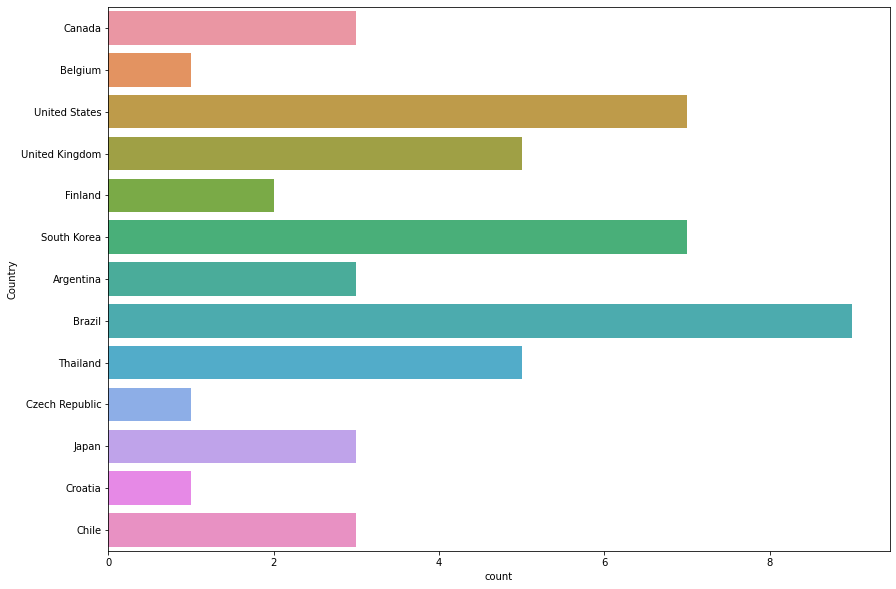

In [17]:
#Count of players across countries
plt.figure(figsize=(14,10))
sns.countplot(data = players, y='Country')

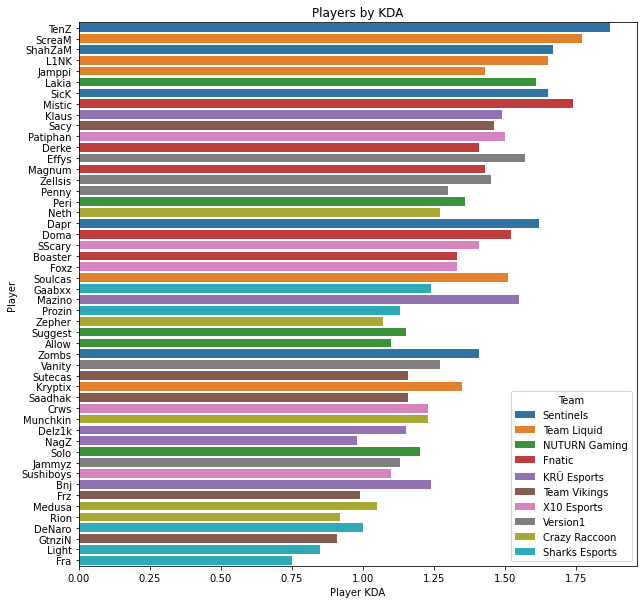

In [18]:
# Comparing KDA's of players across Master's Tournament
plt.figure(figsize=(10,10))
sns.barplot(x='KDA', y='Player', data =players, hue='Team', dodge=False)
plt.xlabel('Player KDA')
plt.title('Players by KDA')
plt.show()

***END OF PLAYER DATAFRAME ANALYZTION***

In [19]:
# importing map picks by days of tournament
maps = pd.read_csv('map_pick_stats.csv')
maps.head()

,Map,Total,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,Ascent,16,3,3,2,3,2,2,1
1,Bind,9,1,0,2,1,2,2,1
2,Haven,15,3,3,2,2,3,1,1
3,Icebox,10,2,2,3,1,1,0,1
4,Split,6,0,1,0,2,1,1,1


In [20]:
# summary statistics of map picks across tournament
maps.describe()

,Total,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
count,5.000000,5.00000,5.00000,5.000000,5.00000,5.00000,5.00000,5.0
mean,11.200000,1.80000,1.80000,1.800000,1.80000,1.80000,1.20000,1.0
std,4.207137,1.30384,1.30384,1.095445,0.83666,0.83666,0.83666,0.0
min,6.000000,0.00000,0.00000,0.000000,1.00000,1.00000,0.00000,1.0
25%,9.000000,1.00000,1.00000,2.000000,1.00000,1.00000,1.00000,1.0
50%,10.000000,2.00000,2.00000,2.000000,2.00000,2.00000,1.00000,1.0
75%,15.000000,3.00000,3.00000,2.000000,2.00000,2.00000,2.00000,1.0
max,16.000000,3.00000,3.00000,3.000000,3.00000,3.00000,2.00000,1.0


In [21]:
# checking for null objects and data types across columns
maps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Map     5 non-null      object
 1   Total   5 non-null      int64 
 2   Day 1   5 non-null      int64 
 3   Day 2   5 non-null      int64 
 4   Day 3   5 non-null      int64 
 5   Day 4   5 non-null      int64 
 6   Day 5   5 non-null      int64 
 7   Day 6   5 non-null      int64 
 8   Day 7   5 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 488.0+ bytes


AxesSubplot(0.125,0.125;0.775x0.755)


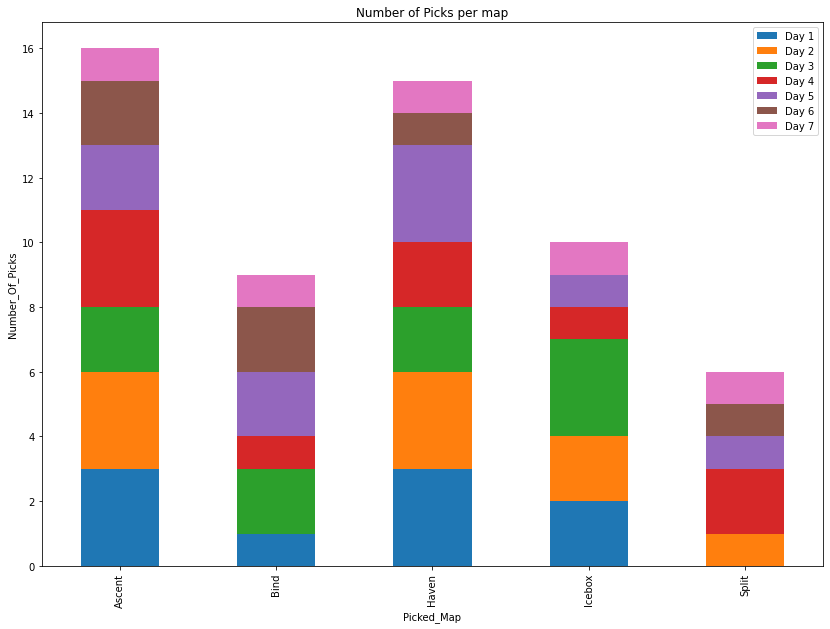

In [22]:
# Visualzation of map picks stacked by days
df = maps.drop(["Total"], axis=1)
ax = df.plot(kind='bar', figsize=(14,10), stacked=True)
ax.set_xlabel('Picked_Map')
ax.set_ylabel('Number_Of_Picks')
ax.set_title('Number of Picks per map')
ax.set_xticklabels(maps['Map'])
print(ax)

In [23]:
#importing dataset of banned maps across Valorant Masters Tournament
map_bans = pd.read_csv('banned_maps_stats.csv')

AxesSubplot(0.125,0.125;0.775x0.755)


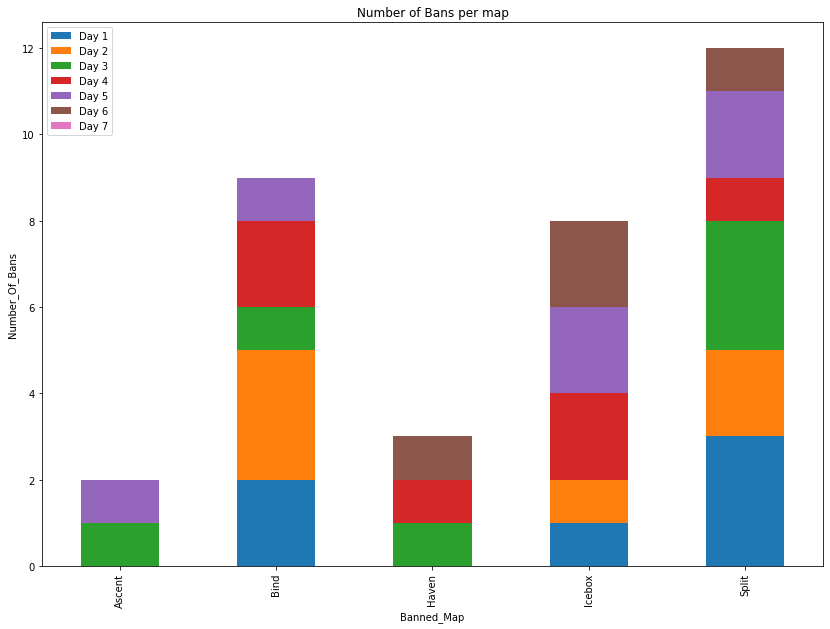

In [24]:
# Visualzation of map bans stacked by days
df1 = map_bans.drop(["Total"], axis=1)
ax = df1.plot(kind='bar', figsize=(14,10), stacked=True)
ax.set_xlabel('Banned_Map')
ax.set_ylabel('Number_Of_Bans')
ax.set_title('Number of Bans per map')
ax.set_xticklabels(map_bans['Map'])
print(ax)

**END OF MAP BANS/PICKS ANALYZATION**

In [25]:
#importing data frame of map wins across Valorant Masters based on Atk/Def Side of Map
map_wins = pd.read_csv('side_pick_stats.csv')

In [26]:
map_wins.head()

,Map,Atk Wins,Def Wins
0,Ascent,96,130
1,Bind,74,55
2,Haven,130,105
3,Icebox,99,88
4,Split,44,53


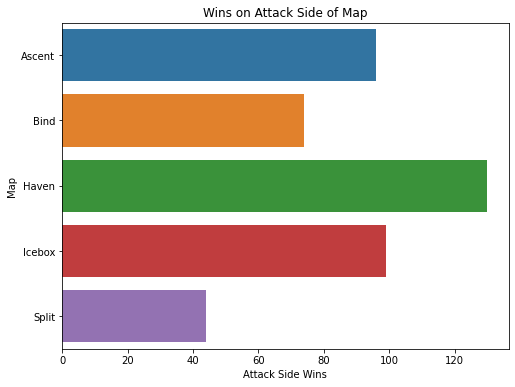

In [27]:
#Visulization of Wins across maps based on attack side
atk_wins = map_wins.drop(columns={'Def Wins'}, axis=0)
plt.figure(figsize=(8,6))
sns.barplot(x='Atk Wins', y='Map', data =atk_wins)
plt.xlabel('Attack Side Wins')
plt.title('Wins on Attack Side of Map')
plt.show()

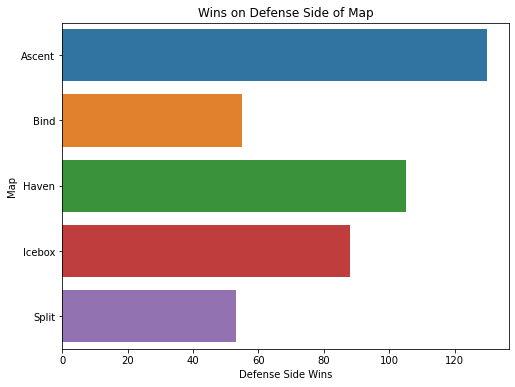

In [28]:
#Visulization of Wins across maps based on defense side
def_wins = map_wins.drop(columns={'Atk Wins'}, axis=0)
plt.figure(figsize=(8,6))
sns.barplot(x='Def Wins', y='Map', data =def_wins)
plt.xlabel('Defense Side Wins')
plt.title('Wins on Defense Side of Map')
plt.show()

**END OF MAP WINS BY SIDE DATA ANALYSIS**

In [29]:
#importing seperate data set reporting earnings, wins, and tiers of players across various tournaments
player_earnings = pd.read_csv('Players.csv')
# overview of dataset
player_earnings.head()

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"


In [30]:
#viewing columns names of player_earnings data
player_earnings.columns

Index(['Rank', 'Player', 'Gold', 'Silver', 'Bronze', 'S Tier', 'Earnings'], dtype='object')

In [31]:
#viewing shape of player_earnings dataset
print(f'shape of player earnings data frame: ', player_earnings.shape)

shape of player earnings data frame:  (500, 7)


In [32]:
#stripping our data sets non-numeric markers for data visualization and manipulation
player_earnings['Earnings'] = player_earnings['Earnings'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
player_earnings['Earnings'] = player_earnings["Earnings"].str.replace(',', '')
player_earnings['Earnings'] = pd.to_numeric(player_earnings['Earnings'])
#sorting the values first by gold to see if there is any visible bearing on placement to earnings
player_earnings.sort_values(by='Gold', ascending=False).head()

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
263,264,Critical,26,9,3,0,10171
90,91,rite2ace,25,9,6,0,23184
116,117,Amaterasu,23,7,4,0,19478
361,362,AslaN,23,4,1,0,7457
319,320,gob b,21,5,2,0,8337


In [33]:
#sorting the values second by earnings to check visible correlation from different sorting
player_earnings.sort_values(by='Earnings', ascending=False).head(20)

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,113550
1,2,ShahZaM,13,4,1,1,113450
2,3,dapr,14,3,1,1,112870
3,4,SicK,12,3,1,1,112650
4,5,cNed,12,4,2,1,107735
5,6,starxo,12,4,1,1,104394
6,7,Kiles,6,4,2,1,104093
7,8,nAts,14,6,0,1,103829
8,9,Chronicle,13,6,0,1,103574
9,10,d3ffo,12,4,2,1,102773


In [34]:
#defining S Tier players as a seperate data frame 
s_tier_players = player_earnings[player_earnings['S Tier'] == 1]

In [35]:
#data frame of s tier players
s_tier_players

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,113550
1,2,ShahZaM,13,4,1,1,113450
2,3,dapr,14,3,1,1,112870
3,4,SicK,12,3,1,1,112650
4,5,cNed,12,4,2,1,107735
5,6,starxo,12,4,1,1,104394
6,7,Kiles,6,4,2,1,104093
7,8,nAts,14,6,0,1,103829
8,9,Chronicle,13,6,0,1,103574
9,10,d3ffo,12,4,2,1,102773


In [36]:
#creating for loop to append player list of common players between their earnings and
#if they were participants of Valorant Masters 2021
player_names = []
for index, row in player_earnings.iterrows():
    # check if the value in column 'Player' of df1 is present in column 'Player' of df2
    if row['Player'] in players['Player'].values:
        # if it is, add it to the list
        player_names.append(row['Player'])

AxesSubplot(0.125,0.125;0.775x0.755)


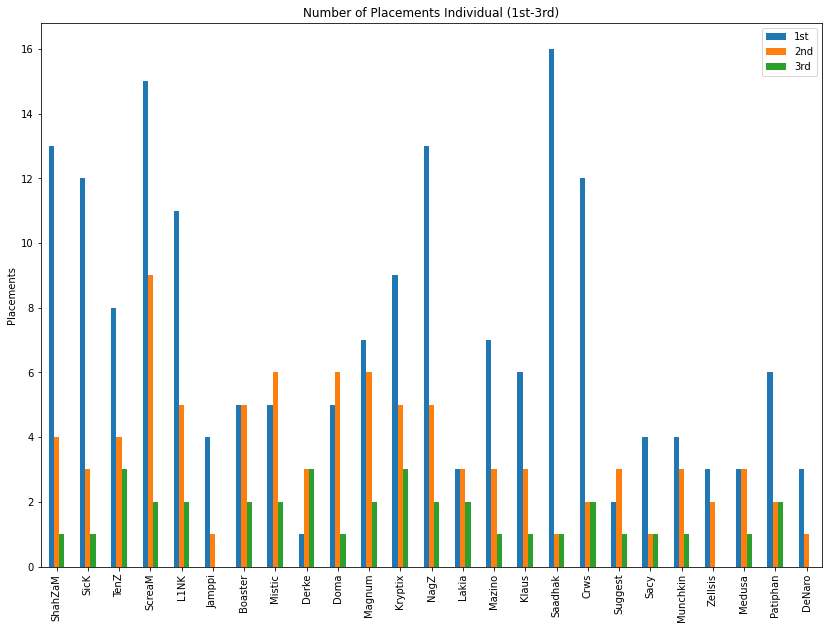

In [37]:
# dropping irrelevant columns for graphing placement purposes
df2 = player_earnings.drop(["S Tier", 'Earnings', 'Rank'], axis=1)
# renaming placement tiers
df2.rename(columns={"Gold":"1st",'Silver':"2nd", "Bronze":"3rd"}, inplace=True)
#using previously made list to sort through dataframe and only take those part of
#Valorant Masters 2021
top_players = df2[df2['Player'].isin(players['Player'])]
#setting up plot figure for bar graph player placements
ax = top_players.plot(kind='bar', figsize=(14,10))
#label axes
ax.set_xticklabels(player_names)
ax.set_ylabel('Placements')
ax.set_title('Number of Placements Individual (1st-3rd)')
#displaying bar plot
print(ax)

***End of Individual placements and Earnings Analyzations***

In [38]:
#importing earnings and placements of Teams
team_earnings = pd.read_csv('Teams.csv')

In [39]:
#general overview of team_earnings data frame
print(team_earnings.head())

   Rank            Team  Gold  Silver  Bronze  S Tier  Earnings
0     1       Sentinels    12       3       1       1  $561,500
1     2           Acend     5       1       1       1  $498,859
2     3  Gambit Esports     8       3       0       1  $495,638
3     4     Team Liquid     4       2       2       0  $295,374
4     5      G2 Esports     7       2       1       0  $257,925


In [40]:
#checking data types of columns
team_earnings.dtypes

Rank         int64
Team        object
Gold         int64
Silver       int64
Bronze       int64
S Tier       int64
Earnings    object
dtype: object

In [41]:

#Cleaning the earnings column of non-numeric markers and chaning it's data type to numeric
#for easier visulaization and manipulation
team_earnings['Earnings'] = team_earnings['Earnings'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
team_earnings['Earnings'] = team_earnings["Earnings"].str.replace(',', '')
team_earnings['Earnings'] = pd.to_numeric(team_earnings['Earnings'])


In [42]:
#creating and appending team_name list for future use to match earnings and placemements
#with their teams
team_names = []
for index, row in team_earnings.iterrows():
    # check if the value in column 'A' of df1 is present in column 'C' of df2
    if row['Team'] in players['Team'].values:
        # if it is, add it to the list
        team_names.append(row['Team'])

AxesSubplot(0.125,0.125;0.775x0.755)


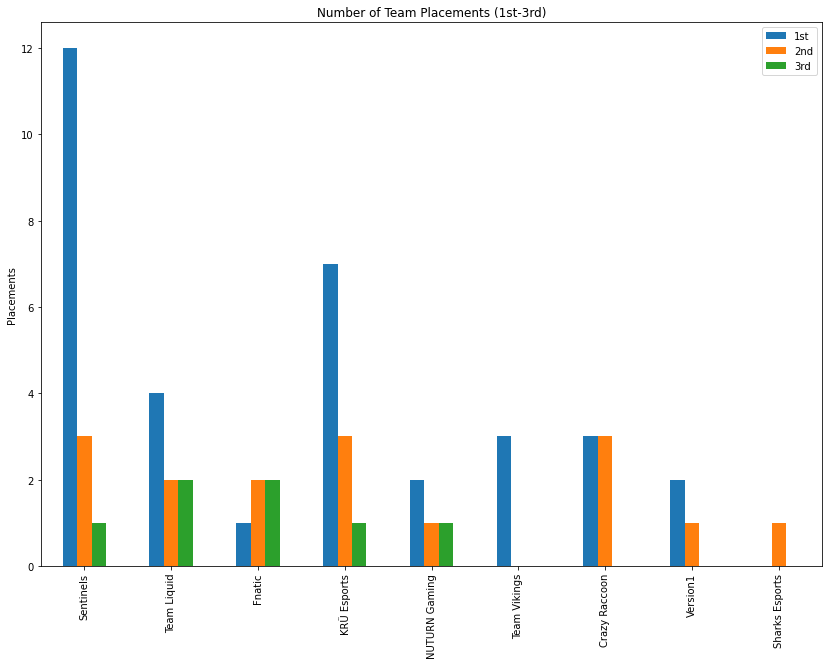

In [43]:
#dropping irrelevant columns for team placement bar plotting
df3 = team_earnings.drop(["S Tier", 'Earnings', 'Rank'], axis=1)
#renaming data frame columns
df3.rename(columns={"Gold":"1st",'Silver':"2nd", "Bronze":"3rd"}, inplace=True)
#filtering only for teams involved in Valorant Masters 2021 data frame
common_objects = df3[df3['Team'].isin(players['Team'])]
#setting up bar plot for Team placements
ax = common_objects.plot(kind='bar', figsize=(14,10))
#labeling axes, x-ticks, and labels
ax.set_xticklabels(team_names)
ax.set_ylabel('Placements')
ax.set_title('Number of Team Placements (1st-3rd)')
#displaying team placements
print(ax)

***End of Team earnings and placement data frame***

In [44]:
#creating new data frame without display of S Tier
best_players = player_earnings.copy()
#filtering data to be only participants of Valorant Masters 2021
best_players = best_players[best_players['Player'].isin(players['Player'])]

In [45]:
#general overview of new data frame
best_players.head()
best_players.to_csv('bestest.csv')

In [46]:
#merging new dataframe into original Valorant Master data frame
best_players = players.merge(best_players, how='left', on='Player')

In [47]:
#general overview of newly filtered, cleaned, and merged data frame
best_players.head()
best_players.to_csv('best_player_earnings.csv')

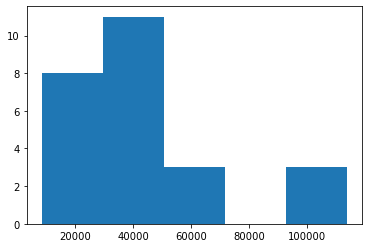

In [48]:
#plotting distribution of earnings across Valorant Masters participators
plt.hist(best_players.Earnings, bins= 5)
plt.show()

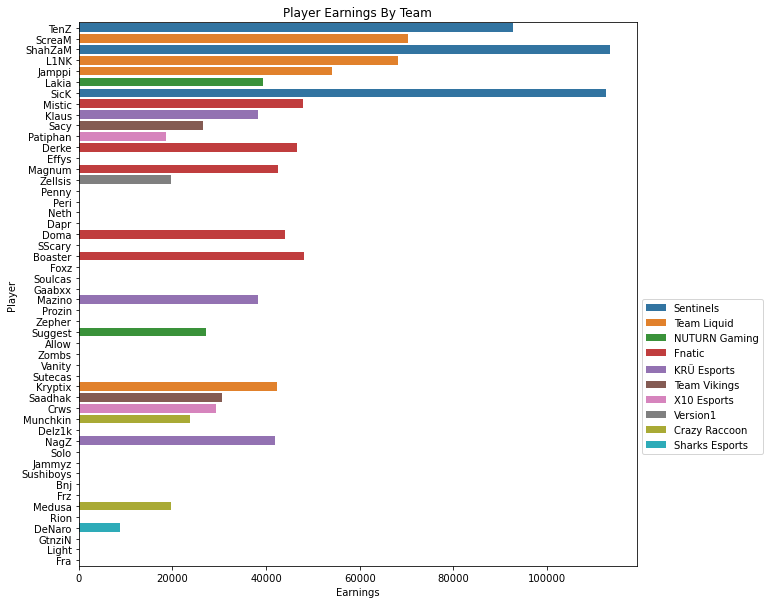

In [49]:
#plotting earnings of Valorant Masters players differentiated by their team
plt.figure(figsize=(10,10))
sns.barplot(data=best_players, y='Player', x='Earnings', hue='Team', dodge=False)
plt.title('Player Earnings By Team')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))


In [50]:
best_players.head()


,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,...,A/Map,Map1,Map2,Map3,Rank,Gold,Silver,Bronze,S Tier,Earnings
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,...,6.1,Jett,Reyna,Raze,15.0,8.0,4.0,3.0,1.0,92750.0
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,...,6.2,Sage,Phoenix,,16.0,15.0,9.0,2.0,0.0,70399.0
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,...,5.7,Sova,Jett,,2.0,13.0,4.0,1.0,1.0,113450.0
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,...,6.3,Brimstone,Omen,,18.0,11.0,5.0,2.0,0.0,68083.0
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,...,3.5,Jett,Killjoy,,24.0,4.0,1.0,0.0,0.0,53980.0


In [51]:
#creating new folder for tableau manipulation
team_placings = pd.DataFrame(best_players.Team)


In [52]:
#removing duped teams and resetting index
team_placings = team_placings.drop_duplicates().reset_index()

In [53]:
#naming for ease of use in tableau
team_placings['Team g'] = team_placings['Team']
team_placings['Team s'] = team_placings['Team']
team_placings['Team b'] = team_placings['Team']

In [54]:
#exporting newly saved file
team_placings.to_csv('place_colors.csv')

In [55]:
best_players.columns

Index(['Player', 'Country', 'Team', 'Maps', 'K', 'D', 'A', 'KD', 'KDA',
       'ACS/Map', 'K/Map', 'D/Map', 'A/Map', 'Map1', 'Map2', 'Map3', 'Rank',
       'Gold', 'Silver', 'Bronze', 'S Tier', 'Earnings'],
      dtype='object')

In [56]:
#shape of main df
best_players.shape

(50, 22)

In [57]:
#data types of main df
best_players.dtypes

Player       object
Country      object
Team         object
Maps          int64
K             int64
D             int64
A             int64
KD          float64
KDA         float64
ACS/Map       int64
K/Map       float64
D/Map       float64
A/Map       float64
Map1         object
Map2         object
Map3         object
Rank        float64
Gold        float64
Silver      float64
Bronze      float64
S Tier      float64
Earnings    float64
dtype: object

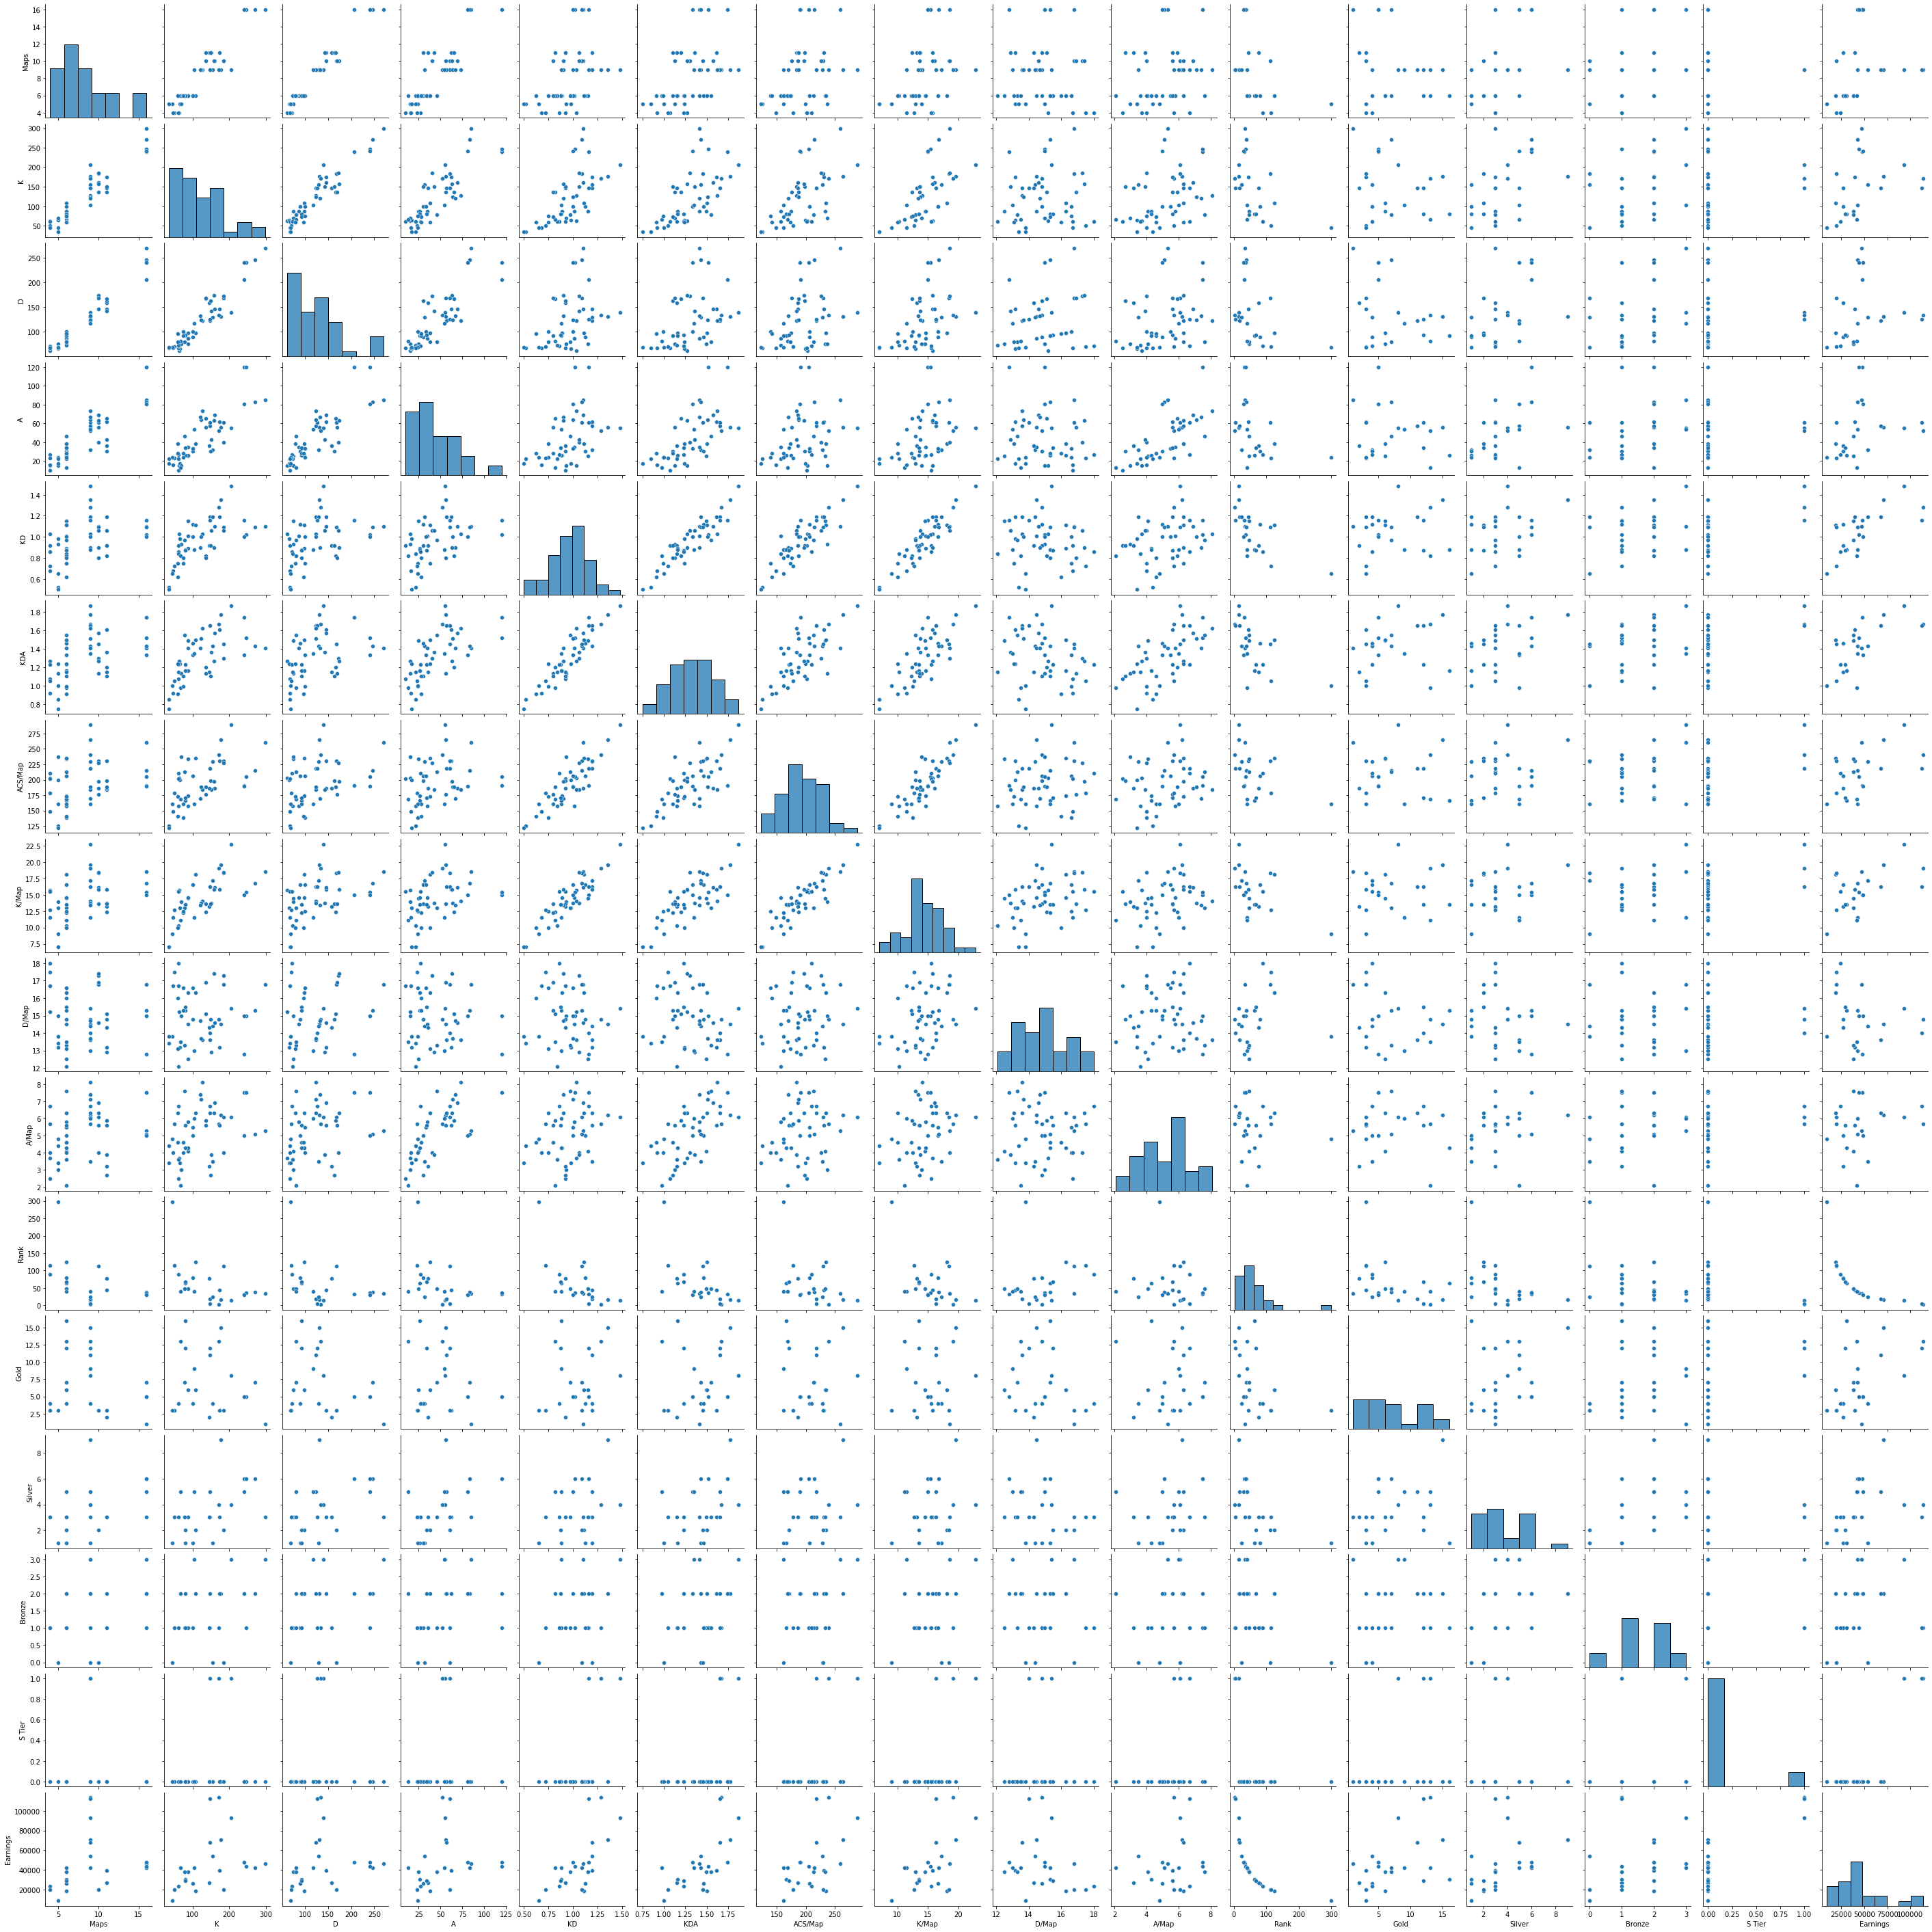

In [58]:
#checking relationship of all variables
sns.pairplot(best_players)

<AxesSubplot:>

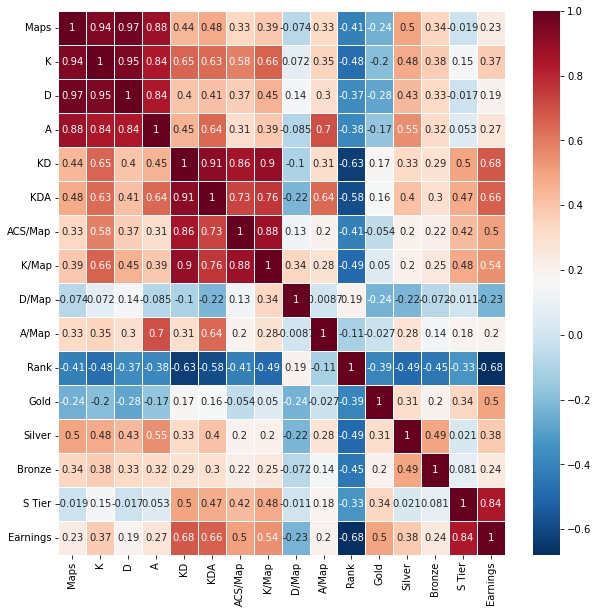

In [59]:
#Heatmap for better correlation visualization
corr = best_players.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, annot=True, linewidths=0.5, ax=ax, cmap='RdBu_r')



In [292]:
#Data manipulation for testing
test = best_players.copy()
test.drop(columns={'Player', 'Gold', 'Silver', 'Bronze', 'S Tier', 'Rank'}, axis=1, inplace=True)

In [293]:
#removing unfufilled columns for testing
test = test.dropna()


In [294]:
#creating dummies for categorical variables in test sets
categorical_columns = test.select_dtypes(include=['object']).columns
test = pd.get_dummies(test, columns=categorical_columns)

In [295]:
#checking test data frame values
test


,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,...,Map2_ Sage,Map2_ Skye,Map2_ Sova,Map2_ Viper,Map3_,Map3_ Breach,Map3_ Raze,Map3_ Sage,Map3_ Skye,Map3_ Sova
0,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,...,0,0,0,0,0,0,1,0,0,0
1,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,...,0,0,0,0,1,0,0,0,0,0
2,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,...,0,0,0,0,1,0,0,0,0,0
3,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,...,0,0,0,0,1,0,0,0,0,0
4,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,...,0,0,0,0,1,0,0,0,0,0
5,11,174,146,62,1.19,1.61,231,15.8,13.2,5.6,...,0,0,0,0,1,0,0,0,0,0
6,9,147,126,61,1.16,1.65,218,16.3,14.0,6.7,...,0,0,0,0,0,0,0,0,0,1
7,16,240,206,120,1.16,1.74,191,15.0,12.8,7.5,...,0,1,0,0,1,0,0,0,0,0
8,6,87,75,25,1.15,1.49,234,14.5,12.5,4.1,...,0,1,0,0,1,0,0,0,0,0
9,6,100,89,30,1.12,1.46,206,16.6,14.8,5.0,...,0,0,0,0,1,0,0,0,0,0


In [296]:
#test.info()

In [297]:
#splitting data for training
x = test.drop('Earnings', axis=1)
y = test.Earnings

In [298]:
#x.info()

In [299]:
#importing train test split
from sklearn.model_selection import train_test_split

In [307]:
#spliting data for linear regression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [308]:
#instantiating linear regression model
import category_encoders as ce
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
encoder = ce.TargetEncoder(return_df=True)

In [309]:
#training model
mlr.fit(x_train, y_train)

LinearRegression()

In [310]:
#for accuarcy scores
y_predict = mlr.predict(x_test)

In [311]:
#training score
train_score = (mlr.score(x_train, y_train))
train_score

1.0

In [312]:
#testing score
test_score = (mlr.score(x_test, y_test))
test_score

0.5307705369027014

In [313]:
#differences between train and test models
score_dif = train_score - test_score
score_dif

0.4692294630972986

In [314]:
#coeffiecient check
print(mlr.coef_)

[-2.51896132e+03  9.14953470e+02 -4.98699235e+02 -6.67690205e+02
  3.43386713e+02  7.21578869e+02 -2.90814894e+02  8.96661462e+01
 -5.04800205e+03  2.86315406e+03  4.57445181e+03 -5.45696821e-12
 -1.35141840e+04  6.03096652e+02  1.31059269e+03  4.04850477e+03
 -3.56977069e+03 -3.93711248e+03  2.54185067e+03 -2.72640433e+03
  2.90505804e+03  7.76391684e+03  2.54185067e+03 -2.22271007e+03
  1.61831933e+03  0.00000000e+00  1.85275653e+04 -4.84318296e+03
  1.66938971e+03 -4.40427584e+03 -1.01605518e+04 -2.72640433e+03
  9.17948332e+02  2.01385447e+03 -4.02889458e+03 -9.15587072e+03
  0.00000000e+00  0.00000000e+00  4.04850477e+03  1.84893605e+02
  6.95213538e+03 -9.32571262e+02 -1.09723333e+04  1.84893605e+02
  6.96954476e+02  1.79244687e+04 -3.44464766e+02  6.06235924e+03
 -1.01605518e+04  0.00000000e+00  6.03096652e+02  1.31059269e+03
 -6.54280244e+03  4.14908494e+03 -2.91129793e+03  9.11518869e+02
  0.00000000e+00  4.65160142e+03 -2.91129793e+03 -2.65182236e+03
  0.00000000e+00]


In [315]:
#intercept check
mlr.intercept_

153043.4697709158

In [316]:
#seperating unknown data for predictions
df_null = best_players[best_players['Earnings'].isnull()]

In [317]:
#dropping non-implemented variables for model
df_null = df_null.drop(columns={'Gold', 'Silver', 'Bronze', 'S Tier', 'Earnings', 'Rank'}, axis=1)

In [318]:
#checking dtypes for dummies
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 12 to 49
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   25 non-null     object 
 1   Country  25 non-null     object 
 2   Team     25 non-null     object 
 3   Maps     25 non-null     int64  
 4   K        25 non-null     int64  
 5   D        25 non-null     int64  
 6   A        25 non-null     int64  
 7   KD       25 non-null     float64
 8   KDA      25 non-null     float64
 9   ACS/Map  25 non-null     int64  
 10  K/Map    25 non-null     float64
 11  D/Map    25 non-null     float64
 12  A/Map    25 non-null     float64
 13  Map1     25 non-null     object 
 14  Map2     25 non-null     object 
 15  Map3     25 non-null     object 
dtypes: float64(5), int64(5), object(6)
memory usage: 3.3+ KB


In [319]:
#placing dummies
df_null = pd.get_dummies(df_null, columns=categorical_columns)

In [320]:
#checking data types of prediction df
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 12 to 49
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  25 non-null     object 
 1   Maps                    25 non-null     int64  
 2   K                       25 non-null     int64  
 3   D                       25 non-null     int64  
 4   A                       25 non-null     int64  
 5   KD                      25 non-null     float64
 6   KDA                     25 non-null     float64
 7   ACS/Map                 25 non-null     int64  
 8   K/Map                   25 non-null     float64
 9   D/Map                   25 non-null     float64
 10  A/Map                   25 non-null     float64
 11  Country_Argentina       25 non-null     uint8  
 12  Country_Brazil          25 non-null     uint8  
 13  Country_Canada          25 non-null     uint8  
 14  Country_Chile           25 non-null     uin

In [321]:
#creation of dictionary for prediction inputs
index = df_null.index
index_values = index.values

# Get the column values for each index
result = {}
for i, index_value in enumerate(index_values):
    row = df_null.iloc[i].to_dict()
    result[index_value] = row


In [322]:
#result

In [323]:
key = 12

# Get the values for the selected key
values = result[key].values()
#creating array for player Effys in prediction
values = (list(values))
new_lst = values[1:]
effys_array = np.array(new_lst)
effys_array = effys_array.reshape(1, -1)

In [324]:
#testing predictions of known variables
mlr.predict(x_test)

array([65944.31533991, 75761.20252519, 57055.9939488 , 37299.24155434,
        7593.25811985])

In [325]:
#saving new data to file for tableau visualization
best_players.to_csv('player_stats_and_earnings.csv')

In [326]:
#saving values of player effys as an array to test mlr prediction 
effys_array = np.array([[ 10.  , 161.  , 146.  ,  69.  ,   1.1 ,   1.57, 186.  ,  16.1 ,
         14.6 ,   6.9 ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0., 1  ]])

In [327]:
#Effys earnings prediction
print(f' predicted earnings of effys:' ,mlr.predict(effys_array))

 predicted earnings of effys: [50200.15917459]


/Users/anthonyshortt/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
